## Chi-squared Distribution

The [Chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution#Sample_mean) with $k$ degrees of freedom, denoted $\chi^2_k$, is the distribution of is the sum of the squares of $k$ independent standard normals:

\begin{equation}
Q = \sum_{i=1}^{k}Z_i^2, \qquad
Z_i \sim \mathcal{N}(0, 1), \qquad
Z_i \perp Z_j \, \forall \, i \neq j.
\end{equation}

Let's look at its PDF for different values of $k$:

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

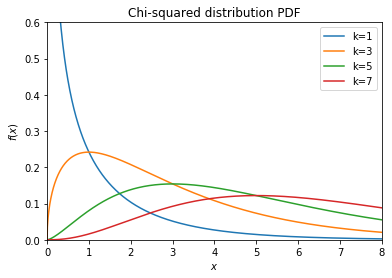

In [36]:
xs = np.linspace(0, 8, 1000)

for k in range(1, 9, 2):
    plt.plot(xs, stats.chi2.pdf(xs, k), label='k={0}'.format(k))

plt.ylim(0, 0.6)
plt.xlim(0, 8)
plt.title("Chi-squared distribution PDF")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend();

Note that the domain of $\chi^2_k$ is positive numbers only. It's easy to compute its mean:

\begin{equation}
\langle Q \rangle
    = \sum_{i=1}^{k}\langle Z_i^2 \rangle
    = \sum_{i=1}^{k}1
    = k.
\end{equation}

Let's also compute the second moment:

\begin{align*}
\langle Q^2 \rangle
    &= \sum_{i,j=1}^{k}\langle Z_i^2 Z_j^2 \rangle \\
    &= \sum_{i,j=1}^{k}\left[\langle Z_i^4 \rangle \delta_{ij} + \langle Z_i^2 \rangle \langle Z_j^2 \rangle (1 - \delta_{ij})\right] \\
    &= \sum_{i,j=1}^{k}\left[3 \delta_{ij} + (1 - \delta_{ij})\right] \\
    &= 2k + k^2,
\end{align*}

where the second equality follows from the fact that $Z_i$ and $Z_j$ are independent for all $i\neq j$. Therefore, the variance of $Q$ is given by:

\begin{equation}
\left\langle \left[Q - \langle Q \rangle \right]^2 \right\rangle
    = \langle Q^2 \rangle - \langle Q \rangle^2
    = 2k.
\end{equation}

Let's verify the PDF of $\chi^2_3$ empirically by simulating standard normals:

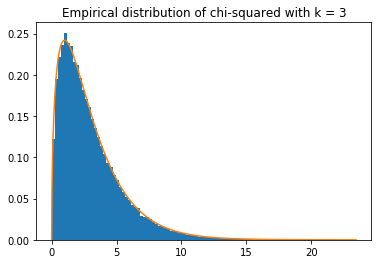

In [37]:
# Make numbers reproducible
np.random.seed(123)

# Create matrix where every row contains a realization of Z_1, Z_2, Z_3.
Z = np.random.normal(size=(50000, 3))
# Compute realization of Q
Q = (Z**2).sum(axis=1)

xs = np.linspace(0, np.max(Q), 1000)
plt.hist(Q, bins=100, normed=True)
plt.plot(xs, stats.chi2.pdf(xs, 3))
plt.title("Empirical distribution of chi-squared with k = 3");

$\chi^2$ comes up quite often in the context of hypothesis testing and confidence intervals. Let's look at an example.

## Sample variance

Suppose $x_1, x_2, \dots, x_N$ are independent samples of $\mathcal{N}(\mu, \sigma^2)$. Then

\begin{equation}
Q \equiv \frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i - \bar{x})^2 \sim \chi^2_{N-1},
\end{equation}

where $\bar{x}$ is the sample mean. Note that $Q$ is related to the sample variance $\hat{\sigma}^2$:

\begin{equation}
Q = (N - 1) \frac{\hat{\sigma}^2}{\sigma^2}, \qquad
\hat{\sigma}^2 = \frac{1}{N - 1}\sum_{i=1}^{n}(x_i - \bar{x})^2.
\end{equation}

We will prove the claim that $Q$ has the chi-squared distribution with $N-1$ degrees of freedom. Before doing that, though, let's verify it empirically:

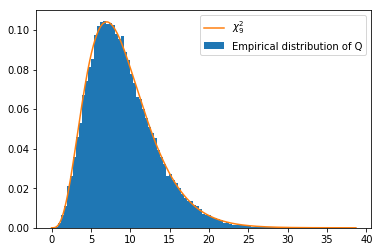

In [35]:
mu = 1.0
sigma = 2.0
N = 10
trials = 50000
# Simulate (x_1, ..., x_10) many times
x = np.random.normal(loc=mu, scale=sigma, size=(trials, N))
# Compute sample mean of each trial
xbar = np.mean(x, axis=1).reshape((trials, 1))
# Compute Q for every trial
Q = np.sum((x - xbar)**2, axis=1) / sigma**2

# Plot
xs = np.linspace(0, np.max(Q), 1000)
plt.hist(Q, bins=100, normed=True, label='Empirical distribution of Q')
plt.plot(xs, stats.chi2.pdf(xs, N - 1), label=r'$\chi^2_{0}$'.format(N-1))
plt.legend();

To prove $Q \sim \chi^2_{N-1}$, we will make use of the following result:

**Claim** Let $Z$ denote an $n$-dimensional vector of independent standard normals. Also, let $M$ be an $n \times n$ idempotent matrix (i.e. $M^T=M$ and $M^2=M$) of rank $n-k$. Then:

\begin{equation}
Z^T M Z \sim \chi^2_{n-k}.
\end{equation}

**Proof** Since $M$ is idempotent, its eigenvalues are either $1$ or $0$. Moreover, there are $n-k$ eigenvectors with eigenvalue $1$, since the number of eigenvectors with non-zero eigenvalues is given by the rank of $M$. Let $v_1, \dots, v_{n-k}$ denote these eigenvectors. Then:

\begin{equation}
M = \sum_{i=1}^{n-k}v_iv_i^T, \qquad
v_i^Tv_j = \delta_{ij}.
\end{equation}

(To confirm that this representation of $M$ is correct, it's enough to check that $Mv_i=v_i$.) We can now rewrite $Z^T M Z$ as

\begin{align*}
Z^T M Z
    &= Z^T \left[\sum_{i=1}^{n-k}v_iv_i^T \right] Z \\
    &= \sum_{i=1}^{n-k}(Z^Tv_i)(v_i^TZ) \\
    &= \sum_{i=1}^{n-k}(v_i^TZ)^2 \\
    &= \sum_{i=1}^{n-k}y_i^2,
\end{align*}

where we've used $Z^Tv_i=(v_i^TZ)^T=v_i^TZ$ since $v_i^TZ$ is a scalar and introduced

\begin{equation}
y_i \equiv v_i^TZ.
\end{equation}

If $y_1, \dots, y_{n-k}$ are independent standard normals, then the proof is concluded since the sum of their squares is distributed as $\chi^2_{n-k}$ by definition.